#### Importing necessary packages:

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
plotly.offline.init_notebook_mode(connected = True)
plt.style.use('ggplot')
from pandas.api.types import CategoricalDtype

#### Reading CSV file and managing nonrelevant/reordering columns:

In [2]:
df = pd.read_csv(r'rideshare_kaggle.csv')

In [53]:
# Dropping non relevant columns
df = df.drop(['timezone', 'apparentTemperature', 'long_summary', 'humidity', 'windGustTime', 'temperatureHighTime',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'sunriseTime', 'sunsetTime', 'temperatureMin', 'temperatureMax', 'timestamp'], axis = 1)

In [439]:
# Reordering columns
df = df[['id', 'hour', 'day', 'month', 'datetime', 'week day', 'time of day', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'price_per', 'price_per_surge_adjusted', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'cloudCover', 'uvIndex']]

In [541]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'week day', 'time of day',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'price_per', 'price_per_surge_adjusted', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'short_summary',
       'precipIntensity', 'precipProbability', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'temperatureLow', 'cloudCover',
       'uvIndex'],
      dtype='object')

In [441]:
df.head()

,id,hour,day,month,datetime,week day,time of day,source,destination,cab_type,...,short_summary,precipIntensity,precipProbability,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,cloudCover,uvIndex
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Sunday,Mid Morning,Haymarket Square,North Station,Lyft,...,Mostly Cloudy,0.0000,0.0,8.66,9.17,10.000,43.68,34.19,0.72,0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Tuesday,Late Night,Haymarket Square,North Station,Lyft,...,Rain,0.1299,1.0,11.98,11.98,4.786,47.30,42.10,1.00,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Wednesday,Night,Haymarket Square,North Station,Lyft,...,Clear,0.0000,0.0,7.33,7.33,10.000,47.55,33.10,0.03,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Friday,Late Night,Haymarket Square,North Station,Lyft,...,Clear,0.0000,0.0,5.28,5.28,10.000,45.03,28.90,0.00,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Thursday,Late Night,Haymarket Square,North Station,Lyft,...,Partly Cloudy,0.0000,0.0,9.14,9.14,10.000,42.18,36.71,0.44,0


#### Cleaning data - finding null values and deleting them:

In [81]:
df.isnull().any(axis=0)

id                   False
hour                 False
day                  False
month                False
datetime             False
time of day          False
source               False
destination          False
cab_type             False
product_id           False
name                 False
price                 True
distance             False
surge_multiplier     False
latitude             False
longitude            False
temperature          False
short_summary        False
precipIntensity      False
precipProbability    False
windSpeed            False
windGust             False
visibility           False
temperatureHigh      False
temperatureLow       False
cloudCover           False
uvIndex              False
dtype: bool

In [82]:
df['price'].isnull().value_counts()

False    637976
True      55095
Name: price, dtype: int64

In [84]:
# Drop all rows with null values (have sufficient data points)
df = df.dropna(axis=0, how = 'any')

#### DataFrame logistics:

In [6]:
# Creating new column 'time of day' from hour column outlining the various times of day
df['time of day'] = df['hour'].apply(lambda row: 'Morning' if row >= 5 and row <9 else 'Mid Morning' if row >= 9 and row <13 else 'Afternoon' if row >= 13 and row <17 else 'Evening' if row >=17 and row <21 else 'Night' if (row >=21 and row<=23) or (row >=0 and row<=1) else "Late Night")

In [172]:
# Highlights the time span of all the data points collected (~23 days)
fst = df['datetime'].min()
lst = df['datetime'].max()
print(fst)
print(lst)
lst-fst

2018-11-26 03:40:46
2018-12-18 19:15:10


Timedelta('22 days 15:34:24')

# Analysis

/Users/benburkey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='distance', ylabel='price'>

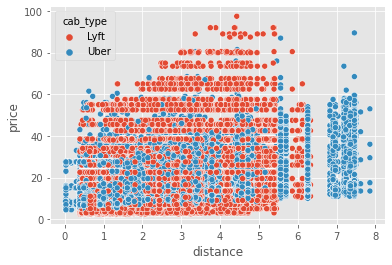

In [418]:
# General plot of price vs. distance w/ a hue for cab_type
time_of_day = df.groupby(['hour']).agg({'price_per':'mean'})
sns.scatterplot(df['distance'], df['price'], hue=df['cab_type'])

In [543]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'week day', 'time of day',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'price_per', 'price_per_surge_adjusted', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'short_summary',
       'precipIntensity', 'precipProbability', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'temperatureLow', 'cloudCover',
       'uvIndex'],
      dtype='object')

In [546]:
df['cloudCover'].unique()

array([0.72, 1.  , 0.03, 0.  , 0.44, 0.12, 0.64, 0.91, 0.53, 0.06, 0.81,
       0.77, 0.02, 0.92, 0.34, 0.39, 0.86, 0.37, 0.3 , 0.48, 0.23, 0.99,
       0.46, 0.35, 0.2 , 0.87, 0.82, 0.98, 0.74, 0.13, 0.41, 0.76, 0.89,
       0.22, 0.78, 0.25, 0.08, 0.56, 0.95, 0.52, 0.75, 0.01, 0.33, 0.04,
       0.67, 0.66, 0.14, 0.31, 0.54, 0.93, 0.97, 0.17, 0.69, 0.55, 0.83,
       0.4 , 0.6 , 0.96, 0.8 , 0.49, 0.21, 0.68, 0.09, 0.94, 0.32, 0.71,
       0.59, 0.16, 0.28, 0.58, 0.29, 0.51, 0.43, 0.27, 0.19, 0.24, 0.79,
       0.61, 0.1 , 0.05, 0.73, 0.42, 0.47])

In [540]:
numeric_val = df['price', 'distance', 'surge multiplier', 'price_per', 'price_per_surge_adjusted', 'temperature', 'precipProbability', ]

ValueError: could not convert string to float: '424553bb-7174-41ea-aeb4-fe06d4f4b9d7'

## Analysis of time/date:

In [434]:
df['week day'] = df['datetime'].apply(lambda x: x.day_name())

<ipython-input-434-329c0142c7a1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime,week day
0,2018-12-16 09:30:07,Sunday
1,2018-11-27 02:00:23,Tuesday
2,2018-11-28 01:00:22,Wednesday
3,2018-11-30 04:53:02,Friday
4,2018-11-29 03:49:20,Thursday
...,...,...
693065,2018-12-01 23:53:05,Saturday
693066,2018-12-01 23:53:05,Saturday
693067,2018-12-01 23:53:05,Saturday
693069,2018-12-01 23:53:05,Saturday


In [488]:
df_uber['week day'] = df_uber['datetime'].apply(lambda x: x.day_name())
df_lyft['week day'] = df_lyft['datetime'].apply(lambda x: x.day_name())

<ipython-input-488-7a9ce969fb5f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-488-7a9ce969fb5f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [474]:
# dict to sort values by days of the week
week_days_dict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Satuday':5, 'Sunday':6}

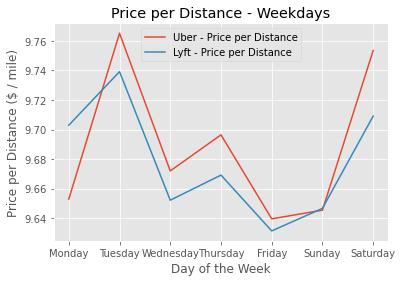

In [537]:
# Line plot of the weekday groupy of both Uber and Lyft's price per distance
df.groupby(['week day', 'cab_type']).agg({'price_per': 'mean'})
weekday_price_uber = df_uber.groupby('week day').agg({'price_per': 'mean'})
weekday_price_lyft = df_lyft.groupby('week day').agg({'price_per': 'mean'})
df_weekday_price_both = pd.merge(weekday_price_uber, weekday_price_lyft, on='week day').sort_values(by=['week day'], key=lambda x:x.map(week_days_dict))
df_weekday_price_both.columns = ['Uber - Price per Distance', 'Lyft - Price per Distance']
df_weekday_price_both.plot(title='Price per Distance - Weekdays', xlabel='Day of the Week', ylabel='Price per Distance ($ / mile)')
plt.legend(loc = 'upper center')

In [514]:
# Total count of rides per hour, avg. surge multiplier each hour, avg. distance per hour, avg. price per distance per hour
time_of_day = df.groupby(['hour']).agg({'id':'size', 'surge_multiplier':'mean', 'distance':'mean', 'price_per':'mean'})
time_of_day

,id,surge_multiplier,distance,price_per
hour,,,,
0,29872,1.015449,2.186149,9.726170
1,26310,1.015317,2.180502,9.663340
2,26323,1.015652,2.192988,9.688609
3,25530,1.014835,2.188440,9.635379
4,26125,1.014526,2.178671,9.628231
5,22995,1.014873,2.179677,9.889194
6,25147,1.014515,2.189237,9.810561
7,22930,1.013945,2.174980,9.550098
8,22337,1.014908,2.199121,9.699164


<AxesSubplot:title={'center':'Price per Distance - Time of Day'}, xlabel='Time of day', ylabel='Price per Distance ($ / mile)'>

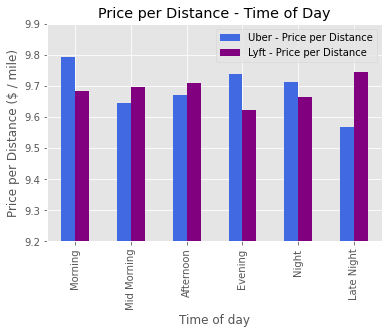

In [538]:
order_dict = {'Morning':0, 'Mid Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late Night':5}

time_of_day_uber = df_uber.groupby(['time of day']).agg({'price_per':'mean'}).sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_lyft = df_lyft.groupby(['time of day']).agg({'price_per':'mean'}).sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_both = pd.merge(time_of_day_uber, time_of_day_lyft, on='time of day').sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_both.columns=['Uber - Price per Distance', 'Lyft - Price per Distance']
time_of_day_both.plot(kind='bar', title='Price per Distance - Time of Day', ylim=(9.2,9.9), xlabel='Time of day', ylabel='Price per Distance ($ / mile)', color=['royalblue', 'purple'])

In [519]:
time_of_day_uber = df_uber.groupby(['time of day']).agg({'price_per':'mean'}).sort_values(by=['time of day'], key=lambda x: x.map(order_dict))
time_of_day_uber

,price_per
time of day,
Morning,9.792259
Mid Morning,9.645065
Afternoon,9.671725
Evening,9.739554
Night,9.712099
Late Night,9.566126


<AxesSubplot:title={'center':'Hourly Price per Distance'}, xlabel='Hour of the day', ylabel='Price per Distance ($ / mile)'>

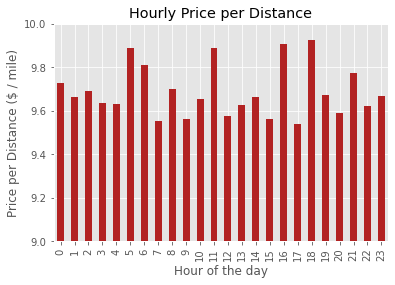

In [539]:
hour_of_day = df.groupby(['hour']).agg({'price_per':'mean'})
hour_of_day.plot(kind='bar', ylim=(9,10), title='Hourly Price per Distance', xlabel='Hour of the day', ylabel='Price per Distance ($ / mile)', legend=False, color='firebrick')


## Analysis of pick-up /drop-off locations:

In [184]:
# Groupby of cab_type - source - destination for multiple ride metrics (surge_multiplier, price, distance, price_per)
loc_source_dest_tot = df.groupby(['cab_type', 'source', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
pd.options.display.max_rows = 150
loc_source_dest_tot

surge_multiplier  \
cab_type source                  destination                                 
Lyft     Back Bay                Boston University                1.066703   
                                 Fenway                           1.064103   
                                 Haymarket Square                 1.060611   
                                 North End                        1.058047   
                                 Northeastern University          1.059529   
                                 South Station                    1.054451   
         Beacon Hill             Boston University                1.033126   
                                 Fenway                           1.035417   
                                 Haymarket Square                 1.028153   
                                 North End                        1.041048   
                                 Northeastern University          1.034868   
                                 South Station                    1.039286   
         Boston University       Back Bay                         1.046830   
                                 Beacon Hill                      1.042338   
                                 Financial District               1.049606   
                                 North Station                    1.044740   
                                 Theatre District                 1.047271   
                                 West End                         1.042633   
         Fenway                  Back Bay                         1.053656   
                                 Beacon Hill                      1.046726   
                                 Financial District               1.051318   
                                 North Station                    1.046043   
                                 Theatre District                 1.049963   
                                 West End                         1.040784   
         Financial District      Boston University                1.028396   
                                 Fenway                           1.028837   
                                 Haymarket Square                 1.025527   
                                 North End                        1.023784   
                                 Northeastern University          1.024281   
                                 South Station                    1.019725   
         Haymarket Square        Back Bay                         1.005902   
                                 Beacon Hill                      1.001482   
                                 Financial District               1.005826   
                                 North Station                    1.004926   
                                 Theatre District                 1.004933   
                                 West End                         1.006510   
         North End               Back Bay                         1.003298   
                                 Beacon Hill                      1.005342   
                                 Financial District               1.006322   
                                 North Station                    1.005365   
                                 Theatre District                 1.004796   
                                 West End                         1.004258   
         North Station           Boston University                1.011525   
                                 Fenway                           1.006419   
                                 Haymarket Square                 1.011300   
                                 North End                        1.011624   
                                 Northeastern University          1.014398   
                                 South Station                    1.012037   
         Northeastern University Back Bay                         1.047410   
                                 Beacon Hill                      1.042132   
  

In [183]:
# Subset of the table above - only including source (destination not included)
loc_source_tot = df.groupby(['cab_type', 'source']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
loc_source_tot

surge_multiplier      price  distance  \
cab_type source                                                           
Lyft     Back Bay                         1.060524  16.564312  1.789977   
         Beacon Hill                      1.035373  16.400389  2.057853   
         Boston University                1.045589  20.084387  3.060895   
         Fenway                           1.047990  19.688681  2.824319   
         Financial District               1.025041  18.794100  2.621228   
         Haymarket Square                 1.004929  13.740825  1.159475   
         North End                        1.004879  15.620160  1.651789   
         North Station                    1.011204  16.959528  2.253310   
         Northeastern University          1.048411  19.021662  2.640075   
         South Station                    1.028659  16.304859  1.785311   
         Theatre District                 1.050304  18.307489  2.258982   
         West End                         1.012212  16.685880  2.130379   
Uber     Back Bay                         1.000000  15.565962  2.160484   
         Beacon Hill                      1.000000  14.979125  2.014316   
         Boston University                1.000000  17.708025  3.042099   
         Fenway                           1.000000  17.161838  2.799614   
         Financial District               1.000000  17.606402  2.790039   
         Haymarket Square                 1.000000  13.426742  1.083833   
         North End                        1.000000  14.719302  1.572555   
         North Station                    1.000000  15.810532  2.186821   
         Northeastern University          1.000000  16.859328  2.799805   
         South Station                    1.000000  15.084187  1.894854   
         Theatre District                 1.000000  15.018846  1.810849   
         West End                         1.000000  15.573203  2.132100   

                                  price_per  
cab_type source                              
Lyft     Back Bay                  9.877535  
         Beacon Hill               8.249361  
         Boston University         6.853650  
         Fenway                    7.304401  
         Financial District       11.762057  
         Haymarket Square         14.164213  
         North End                10.199195  
         North Station             9.380179  
         Northeastern University   7.618860  
         South Station            11.109409  
         Theatre District         10.237309  
         West End                  9.382162  
Uber     Back Bay                  9.682022  
         Beacon Hill               7.801591  
         Boston University         7.585633  
         Fenway                    6.470037  
         Financial District       11.515146  
         Haymarket Square         15.400168  
         North End                10.334937  
         North Station             9.808514  
         Northeastern University   6.440332  
         South Station            10.713576  
         Theatre District         10.936127  
         West End                  9.572639

In [522]:
# Subset of the table above - only including destination (source not included)
loc_dest_tot = df.groupby(['cab_type', 'destination']).agg({'surge_multiplier':'mean', 'price':'mean', 'distance': 'mean', 'price_per': 'mean'})
loc_dest_tot

surge_multiplier      price  distance  \
cab_type destination                                                      
Lyft     Back Bay                         1.031014  16.890019  2.070327   
         Beacon Hill                      1.027902  16.881598  2.194460   
         Boston University                1.034171  20.318453  3.175472   
         Fenway                           1.032143  19.392857  2.947609   
         Financial District               1.030957  18.995274  2.525150   
         Haymarket Square                 1.031966  14.665053  1.341917   
         North End                        1.033175  15.583216  1.618192   
         North Station                    1.030838  17.769387  2.255880   
         Northeastern University          1.031451  18.747821  2.620630   
         South Station                    1.031879  15.047925  1.417773   
         Theatre District                 1.030565  16.808839  1.951278   
         West End                         1.029154  17.075600  2.116599   
Uber     Back Bay                         1.000000  15.576943  2.098669   
         Beacon Hill                      1.000000  15.659300  2.232905   
         Boston University                1.000000  17.662862  2.882274   
         Fenway                           1.000000  16.987131  2.790815   
         Financial District               1.000000  17.155541  2.640674   
         Haymarket Square                 1.000000  13.874955  1.321147   
         North End                        1.000000  14.462033  1.656216   
         North Station                    1.000000  15.909196  2.199167   
         Northeastern University          1.000000  16.971593  2.659277   
         South Station                    1.000000  14.624460  1.793481   
         Theatre District                 1.000000  15.203938  1.900850   
         West End                         1.000000  15.438014  2.115907   

                                  price_per  
cab_type destination                         
Lyft     Back Bay                  8.587297  
         Beacon Hill               8.028860  
         Boston University         6.929165  
         Fenway                    7.006316  
         Financial District       10.811376  
         Haymarket Square         12.302607  
         North End                10.366200  
         North Station            10.676892  
         Northeastern University   7.863221  
         South Station            14.483396  
         Theatre District          9.348251  
         West End                  9.771219  
Uber     Back Bay                  9.161674  
         Beacon Hill               7.734753  
         Boston University         8.123764  
         Fenway                    6.539820  
         Financial District       10.359977  
         Haymarket Square         13.066519  
         North End                 9.886285  
         North Station            10.458470  
         Northeastern University   7.261086  
         South Station            14.482536  
         Theatre District          9.442411  
         West End                  9.770894

In [265]:
# Initializing Uber only data table
df_uber = df[df['cab_type']=='Uber']

In [286]:
# Uber-source data
df_uber_source = df_uber.groupby('source').mean()[['price_per']].sort_values(by='source')
df_uber_source

,price_per
source,
Back Bay,9.682022
Beacon Hill,7.801591
Boston University,7.585633
Fenway,6.470037
Financial District,11.515146
Haymarket Square,15.400168
North End,10.334937
North Station,9.808514
Northeastern University,6.440332


<AxesSubplot:xlabel='source'>

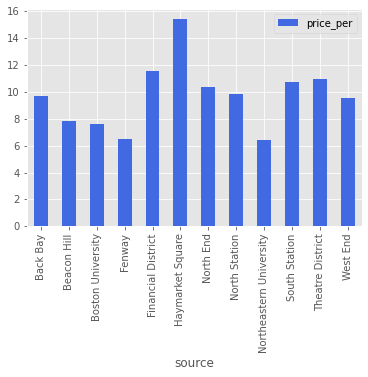

In [335]:
df_uber_source.plot(kind='bar', color='royalblue')

In [268]:
# Initializing Lyft only data table
df_lyft = df[df['cab_type']=='Lyft']
df_lyft

,id,hour,day,month,datetime,time of day,source,destination,cab_type,product_id,...,short_summary,precipIntensity,precipProbability,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,cloudCover,uvIndex
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Mid Morning,Haymarket Square,North Station,Lyft,lyft_line,...,Mostly Cloudy,0.0000,0.0,8.66,9.17,10.000,43.68,34.19,0.72,0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Late Night,Haymarket Square,North Station,Lyft,lyft_premier,...,Rain,0.1299,1.0,11.98,11.98,4.786,47.30,42.10,1.00,0
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Night,Haymarket Square,North Station,Lyft,lyft,...,Clear,0.0000,0.0,7.33,7.33,10.000,47.55,33.10,0.03,0
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Late Night,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,Clear,0.0000,0.0,5.28,5.28,10.000,45.03,28.90,0.00,0
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Late Night,Haymarket Square,North Station,Lyft,lyft_plus,...,Partly Cloudy,0.0000,0.0,9.14,9.14,10.000,42.18,36.71,0.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,086e7cda-2b2d-4736-9d5f-0cd234e04e63,1,29,11,2018-11-29 01:03:40,Night,Theatre District,Fenway,Lyft,lyft_plus,...,Mostly Cloudy,0.0000,0.0,8.41,11.54,9.915,42.61,37.60,0.77,0
693043,177a946d-c7c8-4334-a97a-a8a48efb1bc0,1,29,11,2018-11-29 01:03:40,Night,Theatre District,Fenway,Lyft,lyft_premier,...,Mostly Cloudy,0.0000,0.0,8.41,11.54,9.915,42.61,37.60,0.77,0
693048,871dc1be-d51e-4334-9217-1a6cd00d5058,1,29,11,2018-11-29 01:47:08,Night,Theatre District,Fenway,Lyft,lyft_line,...,Mostly Cloudy,0.0000,0.0,8.41,11.54,9.915,42.61,37.60,0.77,0
693051,aa4e5808-7357-49d3-b539-bd04d4815665,1,29,11,2018-11-29 01:47:08,Night,Theatre District,Fenway,Lyft,lyft,...,Mostly Cloudy,0.0000,0.0,8.41,11.54,9.915,42.61,37.60,0.77,0


In [290]:
# Lyft-source data
df_lyft_source = df_lyft.groupby('source').mean()[['price_per']].sort_values(by='source')
df_lyft_source

,price_per
source,
Back Bay,9.877535
Beacon Hill,8.249361
Boston University,6.853650
Fenway,7.304401
Financial District,11.762057
Haymarket Square,14.164213
North End,10.199195
North Station,9.380179
Northeastern University,7.618860


<AxesSubplot:xlabel='source'>

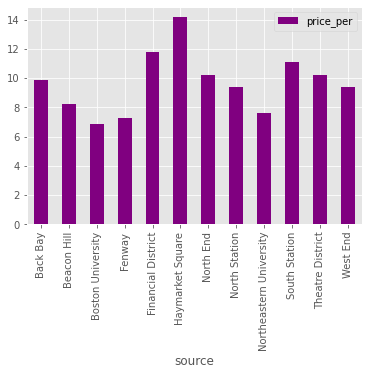

In [334]:
df_lyft_source.plot(kind='bar', color='purple')

In [304]:
# Merged source tables from both Lyft and Uber for plotting purposes
df_source_both = pd.merge(df_uber_source, df_lyft_source, on='source')
df_source_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_source_both

,Uber - price per distance,Lyft - price per distance
source,,
Back Bay,9.682022,9.877535
Beacon Hill,7.801591,8.249361
Boston University,7.585633,6.853650
Fenway,6.470037,7.304401
Financial District,11.515146,11.762057
Haymarket Square,15.400168,14.164213
North End,10.334937,10.199195
North Station,9.808514,9.380179
Northeastern University,6.440332,7.618860


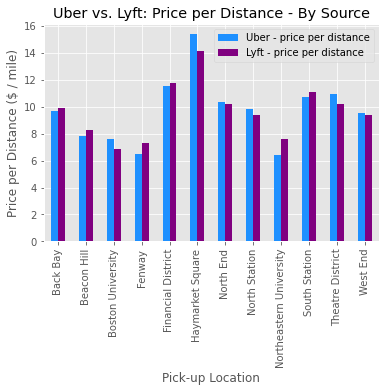

In [352]:
# Plot of Uber and Lyft prices per distance based on SOURCE (pick-up location)
df_source_both.plot(kind='bar', color=['dodgerblue', 'purple'], title = 'Uber vs. Lyft: Price per Distance - By Source', xlabel = 'Pick-up Location', ylabel = 'Price per Distance ($ / mile)')
df_source_both.ylabel = 'Price per Distance (miles)'

<AxesSubplot:title={'center':'Uber vs. Lyft: Price per Distance - By Destination'}, xlabel='Drop-off Location', ylabel='Price per Distance ($ / mile)'>

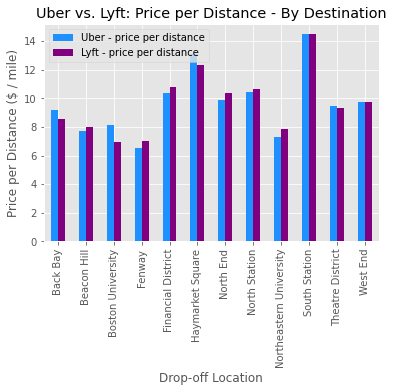

In [370]:
# Plot of Uber and Lyft prices per distance based on DESTINATION (drop-off location)
df_uber_dest = df_uber.groupby('destination').mean()[['price_per']].sort_values(by='destination')
df_lyft_dest = df_lyft.groupby('destination').mean()[['price_per']].sort_values(by='destination')
df_dest_both = pd.merge(df_uber_dest, df_lyft_dest, on='destination')
df_dest_both.columns = ['Uber - price per distance', 'Lyft - price per distance']
df_dest_both.plot(kind='bar', color=['dodgerblue', 'purple'], title = 'Uber vs. Lyft: Price per Distance - By Destination', xlabel = 'Drop-off Location', ylabel = 'Price per Distance ($ / mile)')

In [169]:
print(df['distance'].max())
print(df['distance'].min())

7.86
0.02


In [527]:
# Creating new column - price per distance ($/mile)
df['price_per'] = df['price']/df['distance']

In [526]:
# Surge multiplier adjustment necessary ?
df['price_per_surge_adjusted)'] = df['price_per']/df['surge_multiplier']
df[['price_per_surge_adjusted)']]

,price_per_surge_adjusted)
0,11.363636
1,25.000000
2,15.909091
3,59.090909
4,20.454545
...,...
693065,9.500000
693066,13.000000
693067,9.500000
693069,27.000000


In [168]:
df.groupby('cab_type').agg({'price_per': 'mean','price_per_surge_adjusted': 'mean'})

,price_per,price_per_surge_adjusted
cab_type,,
Lyft,9.683326,9.390518
Uber,9.691718,9.691718
